In [412]:
import numpy as np
import torch
from torchvision import transforms
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable 
torch.manual_seed(1)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [413]:
# Creating the artificial dataset
dim1_data = np.arange(0,2.2,0.1)
dim2_data = np.arange(0,0.22,0.01)

# Find means and std devs
# dim1_mean = dim1_data.mean()
# dim1_std = dim1_data.std()

dim1_data_scaled = (dim1_data - dim1_data.mean())/dim1_data.std()
dim2_data_scaled = (dim2_data - dim2_data.mean())/dim2_data.std()

# all_data = torch.zeros(2,1,22) # should be 3x1 for each pose, just 2x1 for now

# all_data[0,0,:] = dim1_data
# all_data[1,0,:] = dim2_data

# print(all_data)
# print(all_data.size())


In [414]:
class Data2d(Dataset):
    
    # Constructor
    def __init__(self):
#         x_data = all_data_scaled[0,0,:]
#         y_data = all_data_scaled[1,0,:]
        x_data = torch.tensor(dim1_data_scaled)
        y_data = torch.tensor(dim2_data_scaled)
        
        self.x = torch.zeros(20,4)
        self.x[:,3] = y_data[:-2]
        self.x[:,2] = x_data[:-2]
        self.x[:,1] = y_data[1:-1]
        self.x[:,0] = x_data[1:-1]
        
        self.y = torch.zeros(20,2)
        self.y[:,0] = x_data[2:]
        self.y[:,1] = y_data[2:]
        
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Getting the length
    def __len__(self):
        return self.len
# Instantiation of the class  
my_data = Data2d()

In [415]:
# Creating a linear regression model
class lin_reg(nn.Module):

    def __init__(self, in_feat, out_feat):
        super(lin_reg, self).__init__()
        self.linear = nn.Linear(in_feat, out_feat)
        
    def forward(self,x):
        yhat = self.linear(x)
        return yhat
    
# Instantiation of an object
model = lin_reg(4,2)
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[ 0.2576, -0.2207, -0.0969,  0.2347],
        [-0.4707,  0.2999, -0.1029,  0.2544]])), ('linear.bias', tensor([ 0.0695, -0.0612]))])


In [416]:
# Parameters
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01) 
# Training data object which loads the artificial data
trainloader = DataLoader(dataset = my_data, batch_size = 1)
# Training the model
Loss = []  # variable for storing losses after each epoch
epochs = 50

def train_model(epochs):
    for epoch in range(epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat,y)
            Loss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
# Calling the training function          
train_model(epochs)

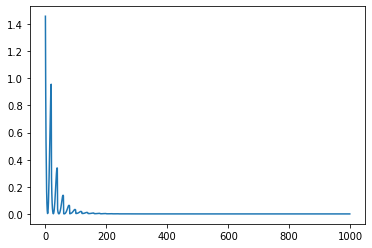

In [417]:
plt.plot(Loss)

In [418]:
for i in range(len(my_data)):
    print(my_data.x[i],my_data.y[i])


tensor([-1.4974, -1.4974, -1.6550, -1.6550]) tensor([-1.3398, -1.3398])
tensor([-1.3398, -1.3398, -1.4974, -1.4974]) tensor([-1.1822, -1.1822])
tensor([-1.1822, -1.1822, -1.3398, -1.3398]) tensor([-1.0245, -1.0245])
tensor([-1.0245, -1.0245, -1.1822, -1.1822]) tensor([-0.8669, -0.8669])
tensor([-0.8669, -0.8669, -1.0245, -1.0245]) tensor([-0.7093, -0.7093])
tensor([-0.7093, -0.7093, -0.8669, -0.8669]) tensor([-0.5517, -0.5517])
tensor([-0.5517, -0.5517, -0.7093, -0.7093]) tensor([-0.3941, -0.3941])
tensor([-0.3941, -0.3941, -0.5517, -0.5517]) tensor([-0.2364, -0.2364])
tensor([-0.2364, -0.2364, -0.3941, -0.3941]) tensor([-0.0788, -0.0788])
tensor([-0.0788, -0.0788, -0.2364, -0.2364]) tensor([0.0788, 0.0788])
tensor([ 0.0788,  0.0788, -0.0788, -0.0788]) tensor([0.2364, 0.2364])
tensor([0.2364, 0.2364, 0.0788, 0.0788]) tensor([0.3941, 0.3941])
tensor([0.3941, 0.3941, 0.2364, 0.2364]) tensor([0.5517, 0.5517])
tensor([0.5517, 0.5517, 0.3941, 0.3941]) tensor([0.7093, 0.7093])
tensor([0.7093

In [419]:
for x,y in trainloader:
        yhat = model(x)
        print('x: ',x.data)
        print('yhat: ',yhat.data)

x:  tensor([[-1.4974, -1.4974, -1.6550, -1.6550]])
yhat:  tensor([[-1.3398, -1.3398]])
x:  tensor([[-1.3398, -1.3398, -1.4974, -1.4974]])
yhat:  tensor([[-1.1822, -1.1822]])
x:  tensor([[-1.1822, -1.1822, -1.3398, -1.3398]])
yhat:  tensor([[-1.0246, -1.0246]])
x:  tensor([[-1.0245, -1.0245, -1.1822, -1.1822]])
yhat:  tensor([[-0.8669, -0.8669]])
x:  tensor([[-0.8669, -0.8669, -1.0245, -1.0245]])
yhat:  tensor([[-0.7093, -0.7093]])
x:  tensor([[-0.7093, -0.7093, -0.8669, -0.8669]])
yhat:  tensor([[-0.5517, -0.5517]])
x:  tensor([[-0.5517, -0.5517, -0.7093, -0.7093]])
yhat:  tensor([[-0.3941, -0.3941]])
x:  tensor([[-0.3941, -0.3941, -0.5517, -0.5517]])
yhat:  tensor([[-0.2364, -0.2364]])
x:  tensor([[-0.2364, -0.2364, -0.3941, -0.3941]])
yhat:  tensor([[-0.0788, -0.0788]])
x:  tensor([[-0.0788, -0.0788, -0.2364, -0.2364]])
yhat:  tensor([[0.0788, 0.0788]])
x:  tensor([[ 0.0788,  0.0788, -0.0788, -0.0788]])
yhat:  tensor([[0.2364, 0.2364]])
x:  tensor([[0.2364, 0.2364, 0.0788, 0.0788]])


In [420]:
query_dim1 = np.array([3.1,3.0])
query_dim2 = np.array([0.31,0.3])
print(query_dim1)
print(query_dim2)

scaled_query_dim1 = (query_dim1 - dim1_mean)/dim1_std
scaled_query_dim2 = (query_dim2 - dim2_mean)/dim2_std
print(scaled_query_dim1)
print(scaled_query_dim2)

new_query = Variable(torch.Tensor([query_dim1]))
print(new_query)

[3.1 3. ]
[0.31 0.3 ]
[3.23125267 3.07363058]
[3.23125258 3.07363049]
tensor([[3.1000, 3.0000]])


In [421]:
# # new_var = Variable(torch.Tensor([[3.1,3.0],[0.31,0.3]])) #this is grouped differently, make it consistent (TODO)
# new_var = Variable(torch.Tensor([3.1,0.31,3.0,0.3]))
# print(new_var[:][0])
# print('true new_var:\n',new_var)

# new_var[0][:] = (new_var[0][:] - dim1_mean) /  dim1_std
# new_var[1][:] = (new_var[1][:] - dim2_mean) /  dim2_std

# # new_var[0][:] = (new_var[0][:] - dim1_mean) /  dim1_std
# # new_var[1][:] = (new_var[1][:] - dim2_mean) /  dim2_std

# print('scaled new_var:\n',new_var)

# new_var = new_var.view(-1,4)

# answer = model(new_var)

# print('\n raw answer:\n',answer)
# print('\n scaled up again:\n')
# print(answer[0][0]*dim1_std + dim1_mean)
# print(answer[0][1]*dim2_std + dim2_mean)

In [422]:
x_data = torch.arange(0,2.2,0.1)
y_data = torch.arange(0,0.22,0.01)

mean_x_data = x_data.mean(0, keepdim=True)
std_x_data = x_data.std(0, unbiased=False, keepdim=True)
x_data -= mean_x_data
x_data /= std_x_data

mean_y_data = y_data.mean(0, keepdim=True)
std_y_data = y_data.std(0, unbiased=False, keepdim=True)
y_data -= mean_y_data
y_data /= std_y_data

new_var = Variable(torch.Tensor([[3.1,0.31,3.0,0.3]]))
model(new_var)

tensor([[2.1359, 0.3681]], grad_fn=<AddmmBackward>)

In [423]:
tmp = torch.Tensor([3.1,0.31,3.0,0.3])
# tmp *= 2

In [424]:
x1 = 3.1
y1 = 0.31
x2 = 3.0
y2 = 0.3

x1 -= mean_x_data
x1 /= std_x_data
x2 -= mean_x_data
x2 /= std_x_data

y1 -= mean_y_data
y1 /= std_y_data
y2 -= mean_y_data
y2 /= std_y_data

new_var = Variable(torch.Tensor([[x1,y1,x2,y2]]))
answer = model(new_var)

print(new_var)
print(answer)

x_ans = answer[0][0] * std_x_data
x_ans = x_ans + mean_x_data
y_ans = answer[0][1] * std_y_data
y_ans = y_ans + mean_y_data

print(x_ans)
print(y_ans)

tensor([[3.2313, 3.2313, 3.0736, 3.0736]])
tensor([[3.3889, 3.3889]], grad_fn=<AddmmBackward>)
tensor([3.2000], grad_fn=<AddBackward0>)
tensor([0.3200], grad_fn=<AddBackward0>)


In [425]:
query_dim1 = np.array([3.1,3.0])
query_dim2 = np.array([0.31,0.3])
print(query_dim1)
print(query_dim2)

scaled_query_dim1 = (query_dim1 - dim1_mean)/dim1_std
scaled_query_dim2 = (query_dim2 - dim2_mean)/dim2_std
print(scaled_query_dim1)
print(scaled_query_dim2)

# Build combination so x and y are adjacent for 1 pose
c = np.empty((scaled_query_dim1.size + scaled_query_dim2.size,))
c[0::2] = scaled_query_dim1
c[1::2] = scaled_query_dim2

new_query = Variable(torch.Tensor([c]))
print(new_query)

answer = model(new_query)
print('\n raw answer:\n',answer)
print('\n scaled up again:\n')
print(answer[0][0]*dim1_std + dim1_mean)
print(answer[0][1]*dim2_std + dim2_mean)

[3.1 3. ]
[0.31 0.3 ]
[3.23125267 3.07363058]
[3.23125258 3.07363049]
tensor([[3.2313, 3.2313, 3.0736, 3.0736]])

 raw answer:
 tensor([[3.3889, 3.3889]], grad_fn=<AddmmBackward>)

 scaled up again:

tensor(3.2000, grad_fn=<AddBackward0>)
tensor(0.3200, grad_fn=<AddBackward0>)
